In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\brivi\Downloads\My Portfolio\inventory-forecasting-project\data\cleaned_sku_sales_data.csv')

In [3]:
sku_code = 'SKU_0204'
sku_data = df[df['SKU_ID'] == sku_code].groupby('Week')['Units_Sold'].sum().reset_index()

In [5]:
sku_data['MA_Prediction'] = sku_data['Units_Sold'].rolling(window=3).mean()


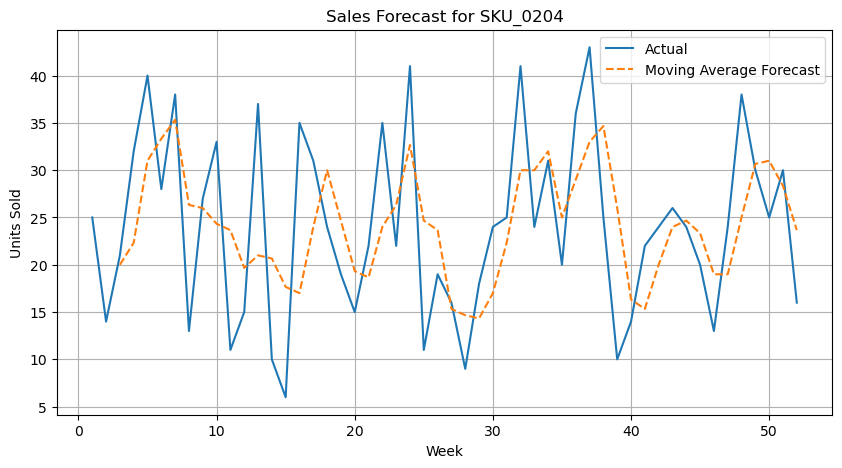

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(sku_data['Week'], sku_data['Units_Sold'], label='Actual')
plt.plot(sku_data['Week'], sku_data['MA_Prediction'], label='Moving Average Forecast', linestyle='--')
plt.title(f'Sales Forecast for {sku_code}')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\brivi\Downloads\My Portfolio\inventory-forecasting-project\visualizations\moving_average_forecast.png', dpi=300, bbox_inches='tight')
plt.show()


## Forecasting with Moving Average

Using a 3-week rolling window, we predicted future demand for SKU_0204. The forecast closely follows recent trends, making it suitable for short-term planning. Future models will include exponential smoothing for more responsiveness.


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Remove NaNs before calculating metrics
valid = sku_data.dropna(subset=['MA_Prediction'])

# Extract actual vs. predicted
y_true = valid['Units_Sold']
y_pred = valid['MA_Prediction']


In [13]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 6.74
RMSE: 8.04
